In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm 
from scipy.io import loadmat
from mpl_toolkits.mplot3d import Axes3D
from time import time

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [41]:
"""Load the datasets."""
images = loadmat('images.mat') 
classes = loadmat('classes')

images=images['images'].T  
classes=classes['classes'].T

In [42]:
#replace images and classes with light_images and light_classes for co
X_train, X_test, y_train, y_test = train_test_split(images, classes, test_size=0.3, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1689, 32256)
(1689, 1)
(725, 32256)
(725, 1)


In [43]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std  = scaler.transform(X_test)

In [44]:
from sklearn import decomposition
import numpy as np
import matplotlib.pyplot as plt

# Initialize the PCA model
pca = decomposition.PCA(n_components=200, whiten=True)

# Fit the PCA model to the training data
pca.fit(X_train_std)

PCA(n_components=200, whiten=True)

PCA-transformed training data shape: (1689, 200)
PCA-transformed test data shape: (725, 200)


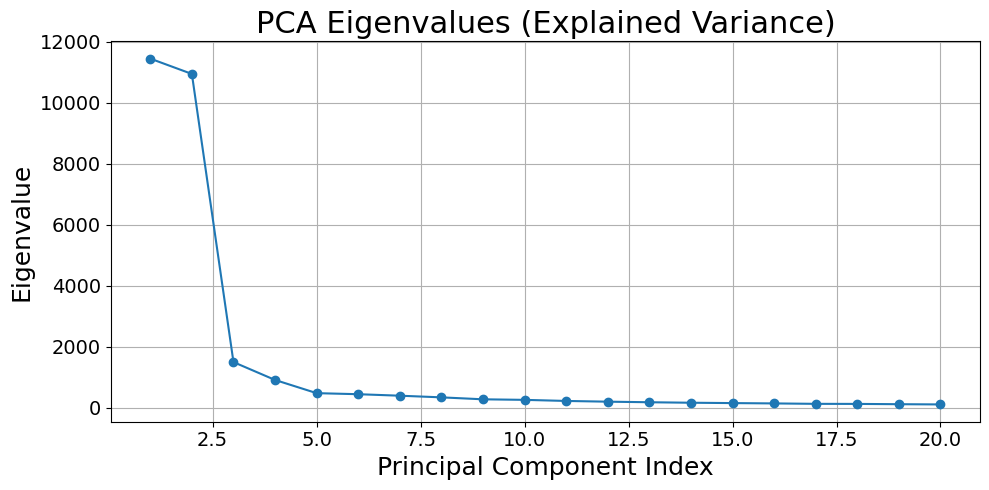

In [45]:
# Transform the training and test data to get the PCA components
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

print(f"PCA-transformed training data shape: {X_train_pca.shape}")
print(f"PCA-transformed test data shape: {X_test_pca.shape}")

# Visualize the explained variance
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, 21), pca.explained_variance_[:20], marker='o')
plt.title("PCA Eigenvalues (Explained Variance)", fontsize=22)
plt.xlabel("Principal Component Index", fontsize=18)
plt.ylabel("Eigenvalue", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [58]:
from sklearn.metrics import f1_score
from sklearn.base import RegressorMixin
import numpy as np
import matplotlib.pyplot as plt

def compute_f1_scores(X_train_pca, X_test_pca, y_train, y_test, clf=None):
    # Define the range of PCA components to try
    components_range = np.arange(5, 101, 5)
    f1_scores = []

    # For each number of components
    for n_components in components_range:
        # Use only the first n_components from the PCA-transformed data
        X_train_subset = X_train_pca[:, :n_components]
        X_test_subset = X_test_pca[:, :n_components]
        
        if clf is None:
            n_classes = len(np.unique(y_train))
            Y_train_ova = np.zeros((X_train_subset.shape[0], n_classes))

            X_aug = np.hstack([X_train_subset, np.ones((X_train_subset.shape[0], 1))])
            X_test_aug = np.hstack([X_test_subset, np.ones((X_test_subset.shape[0], 1))])

            W = np.linalg.pinv(X_aug.T @ X_aug) @ X_aug.T @ Y_train_ova
            Y_pred_scores = X_test_aug @ W
            y_pred = np.argmax(Y_pred_scores, axis=1) + 1
        else:
            # Train the classifier
            clf.fit(X_train_subset, y_train.ravel())
            
            # Get predictions
            raw_predictions = clf.predict(X_test_subset)
        
            y_pred = raw_predictions
        
        # Calculate F1 score
        f1 = f1_score(y_test, y_pred, average='weighted')
        f1_scores.append(f1)

    return components_range, f1_scores

In [47]:
components_range_lin_reg, f1_scores_lin_reg = compute_f1_scores(X_train_pca, X_test_pca, y_train, y_test)

Using 5 PCA components
X_train_pca shape: (1689, 200)
Using 10 PCA components
X_train_pca shape: (1689, 200)
Using 15 PCA components
X_train_pca shape: (1689, 200)
Using 20 PCA components
X_train_pca shape: (1689, 200)
Using 25 PCA components
X_train_pca shape: (1689, 200)
Using 30 PCA components
X_train_pca shape: (1689, 200)
Using 35 PCA components
X_train_pca shape: (1689, 200)
Using 40 PCA components
X_train_pca shape: (1689, 200)
Using 45 PCA components
X_train_pca shape: (1689, 200)
Using 50 PCA components
X_train_pca shape: (1689, 200)
Using 55 PCA components
X_train_pca shape: (1689, 200)
Using 60 PCA components
X_train_pca shape: (1689, 200)
Using 65 PCA components
X_train_pca shape: (1689, 200)
Using 70 PCA components
X_train_pca shape: (1689, 200)
Using 75 PCA components
X_train_pca shape: (1689, 200)
Using 80 PCA components
X_train_pca shape: (1689, 200)
Using 85 PCA components
X_train_pca shape: (1689, 200)
Using 90 PCA components
X_train_pca shape: (1689, 200)
Using 95 PC

In [48]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='rbf', gamma='scale')
components_range_svm, f1_scores_svm = compute_f1_scores(X_train_pca, X_test_pca, y_train, y_test, svm_clf)

Using 5 PCA components
X_train_pca shape: (1689, 200)
Using 10 PCA components
X_train_pca shape: (1689, 200)
Using 15 PCA components
X_train_pca shape: (1689, 200)
Using 20 PCA components
X_train_pca shape: (1689, 200)
Using 25 PCA components
X_train_pca shape: (1689, 200)
Using 30 PCA components
X_train_pca shape: (1689, 200)
Using 35 PCA components
X_train_pca shape: (1689, 200)
Using 40 PCA components
X_train_pca shape: (1689, 200)
Using 45 PCA components
X_train_pca shape: (1689, 200)
Using 50 PCA components
X_train_pca shape: (1689, 200)
Using 55 PCA components
X_train_pca shape: (1689, 200)
Using 60 PCA components
X_train_pca shape: (1689, 200)
Using 65 PCA components
X_train_pca shape: (1689, 200)
Using 70 PCA components
X_train_pca shape: (1689, 200)
Using 75 PCA components
X_train_pca shape: (1689, 200)
Using 80 PCA components
X_train_pca shape: (1689, 200)
Using 85 PCA components
X_train_pca shape: (1689, 200)
Using 90 PCA components
X_train_pca shape: (1689, 200)
Using 95 PC

In [49]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=2000, fit_intercept=True)
components_range_log_reg, f1_scores_log_reg = compute_f1_scores(X_train_pca, X_test_pca, y_train, y_test, log_reg)

Using 5 PCA components
X_train_pca shape: (1689, 200)
Using 10 PCA components
X_train_pca shape: (1689, 200)
Using 15 PCA components
X_train_pca shape: (1689, 200)
Using 20 PCA components
X_train_pca shape: (1689, 200)
Using 25 PCA components
X_train_pca shape: (1689, 200)
Using 30 PCA components
X_train_pca shape: (1689, 200)
Using 35 PCA components
X_train_pca shape: (1689, 200)
Using 40 PCA components
X_train_pca shape: (1689, 200)
Using 45 PCA components
X_train_pca shape: (1689, 200)
Using 50 PCA components
X_train_pca shape: (1689, 200)
Using 55 PCA components
X_train_pca shape: (1689, 200)
Using 60 PCA components
X_train_pca shape: (1689, 200)
Using 65 PCA components
X_train_pca shape: (1689, 200)
Using 70 PCA components
X_train_pca shape: (1689, 200)
Using 75 PCA components
X_train_pca shape: (1689, 200)
Using 80 PCA components
X_train_pca shape: (1689, 200)
Using 85 PCA components
X_train_pca shape: (1689, 200)
Using 90 PCA components
X_train_pca shape: (1689, 200)
Using 95 PC

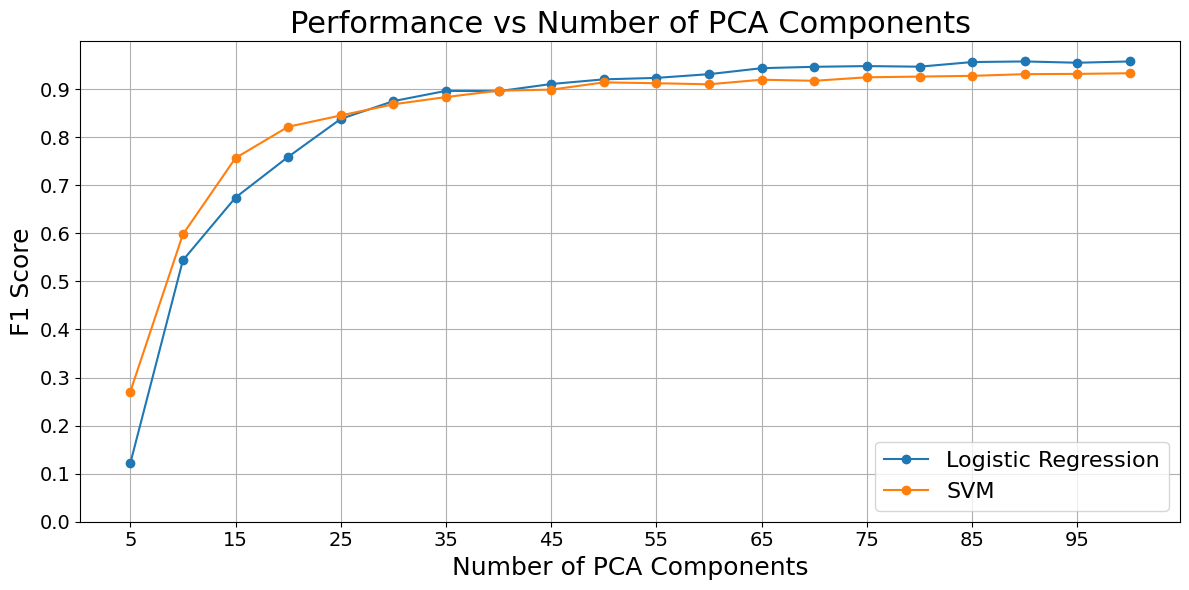

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(components_range_log_reg, f1_scores_log_reg, marker='o', linestyle='-')
plt.plot(components_range_svm, f1_scores_svm, marker='o', linestyle='-')
plt.title("Performance vs Number of PCA Components", fontsize=22)
plt.xlabel("Number of PCA Components", fontsize=18)
plt.ylabel("F1 Score", fontsize=18)
plt.legend(['Logistic Regression', 'SVM'], fontsize=16)
plt.grid(True)
plt.xticks(np.arange(5, 101, 10), fontsize=14)
plt.yticks(np.arange(0, 1, 0.1), fontsize=14)
plt.tight_layout()
plt.show()

In [51]:
n_classes = len(np.unique(y_train))
Y_train_ova = np.zeros((X_train_pca.shape[0], n_classes))

for idx, cls in enumerate(np.unique(y_train)):
    Y_train_ova[:, idx] = (y_train == cls).flatten().astype(float)

# Add bias column to X
X_aug = np.hstack([X_train_pca])  # shape: (N, d+1)

# Solve for W: shape (d+1, n_classes)
W = np.linalg.pinv(X_aug.T @ X_aug) @ X_aug.T @ Y_train_ova

In [52]:
X_test_aug = np.hstack([X_test_pca])  # shape: (N_test, d+1)
Y_pred_scores = X_test_aug @ W  # shape: (N_test, n_classes)

y_pred = np.argmax(Y_pred_scores, axis=1) + 1

Accuracy: 0.9489655172413793
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       0.93      1.00      0.96        13
           3       1.00      0.83      0.91        18
           4       0.89      0.85      0.87        20
           5       0.92      0.96      0.94        23
           6       0.85      1.00      0.92        11
           7       1.00      0.86      0.92        21
           8       1.00      1.00      1.00        22
           9       1.00      0.83      0.91        24
          10       1.00      0.89      0.94        18
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00        22
          13       1.00      0.94      0.97        18
          14       0.93      1.00      0.97        14
          15       0.86      1.00      0.92        24
          16       0.89      0.96      0.92        25
          17       1.00      1.00      1.00        2

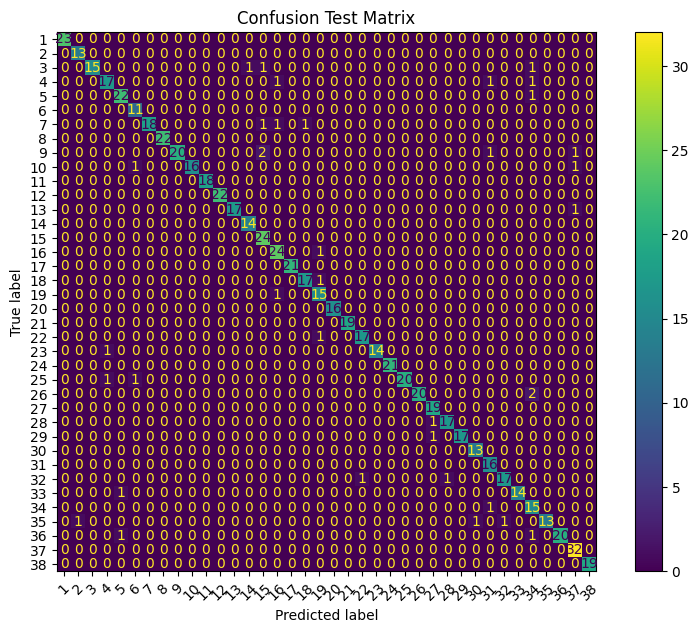

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='viridis', xticks_rotation=45)
disp.figure_.set_size_inches(10, 7)  # directly change the size
plt.title("Confusion Test Matrix")
plt.grid(False)
plt.show()

In [54]:
images2d = np.zeros((images.shape[0], 192, 168))
for i in range(images.shape[0]):
    images2d[i] = images[i].reshape(168, 192).T
X_train, X_test, y_train, y_test = train_test_split(images2d, classes, test_size=0.3, random_state=0)

In [55]:
import cv2

def extract_phase_congruency_features(image, kernels, num_orientations=8, num_scales=5, downsample_factor=8, epsilon=1e-6):
    """
    Extract OGPCI features from a grayscale face image using the standard Gabor kernel bank.

    Parameters:
        image (2D np.ndarray): Grayscale image (e.g. 128x128).
        kernels (list): List of Gabor kernels ordered by scale-major then orientation-minor.
        num_orientations (int): Number of orientations (typically 8).
        num_scales (int): Number of scales (typically 5).
        downsample_factor (int): Factor for downsampling.
        epsilon (float): Small constant to avoid division by zero.

    Returns:
        np.ndarray: 1D vector of concatenated downsampled OGPCIs (augmented phase congruency feature vector).
    """
    h, w = image.shape
    image = image.astype(np.float32)
    
    # Group kernels by orientation (reshape into [num_orientations][num_scales])
    kernel_bank = kernels.reshape((num_scales, num_orientations, 31, 31))
    kernel_bank = kernel_bank.transpose((1, 0, 2, 3))

    ogpcis = []
    
    for v, kernel_set in enumerate(kernel_bank):  # loop over orientations
        A_sum = np.zeros((h, w), dtype=np.float32)
        energy_sum = np.zeros_like(A_sum)

        phi_list = []
        A_list = []

        # Step 1: Compute magnitude and phase for each scale at orientation v
        for u in range(num_scales):
            kernel = kernel_set[u]
            response = cv2.filter2D(image, cv2.CV_64F, kernel)
            real = np.real(response)
            imag = np.imag(response)

            A = np.sqrt(real**2 + imag**2)
            phi = np.arctan2(imag, real)

            A_list.append(A)
            phi_list.append(phi)
            A_sum += A

        # Step 2: Compute mean phase at this orientation
        sin_sum = np.sum([A_list[i] * np.sin(phi_list[i]) for i in range(num_scales)], axis=0)
        cos_sum = np.sum([A_list[i] * np.cos(phi_list[i]) for i in range(num_scales)], axis=0)
        phi_mean = np.arctan2(sin_sum + epsilon, cos_sum + epsilon)

        # Step 3: Compute oriented Gabor phase congruency image (OGPCI)
        for u in range(num_scales):
            delta_phi = np.cos(phi_list[u] - phi_mean) - np.abs(np.sin(phi_list[u] - phi_mean))
            energy_sum += A_list[u] * delta_phi

        ogpci = energy_sum / (A_sum + epsilon)

        # Step 4: Downsample OGPCI
        ogpci_down = cv2.resize(ogpci, (w // downsample_factor, h // downsample_factor)).flatten()
        ogpcis.append(ogpci_down)

    # Step 5: Concatenate downsampled OGPCIs
    return np.concatenate(ogpcis)

def build_gabor_kernels(scales=5, orientations=8, ksize=31, fmax=0.25):
    kernels = []
    for u in range(scales):
        for v in range(orientations):
            theta = v * np.pi / orientations
            lambd = 1 / (fmax / (2 ** (u / 2)))
            kernel = cv2.getGaborKernel((ksize, ksize), sigma=4.0, theta=theta,
                                        lambd=lambd, gamma=0.5, psi=0, ktype=cv2.CV_64F)
            kernels.append(kernel)
    return np.array(kernels)

kernels = build_gabor_kernels()
X_train_gabor = np.array([extract_phase_congruency_features(image=img, kernels=kernels) for img in X_train])
X_test_gabor = np.array([extract_phase_congruency_features(image=img, kernels=kernels) for img in X_test])

In [62]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_gabor)
X_test_std  = scaler.transform(X_test_gabor)

In [66]:
pca.fit(X_train_std)
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [67]:
svm_clf = SVC(kernel='rbf', gamma='scale')
components_range_svm_gabor, f1_scores_svm_gabor = compute_f1_scores(X_train_pca, X_test_pca, y_train, y_test, svm_clf)

In [70]:
log_reg = LogisticRegression(max_iter=2000, fit_intercept=True)
components_range_log_reg_gabor, f1_scores_log_reg_gabor = compute_f1_scores(X_train_pca, X_test_pca, y_train, y_test, log_reg)

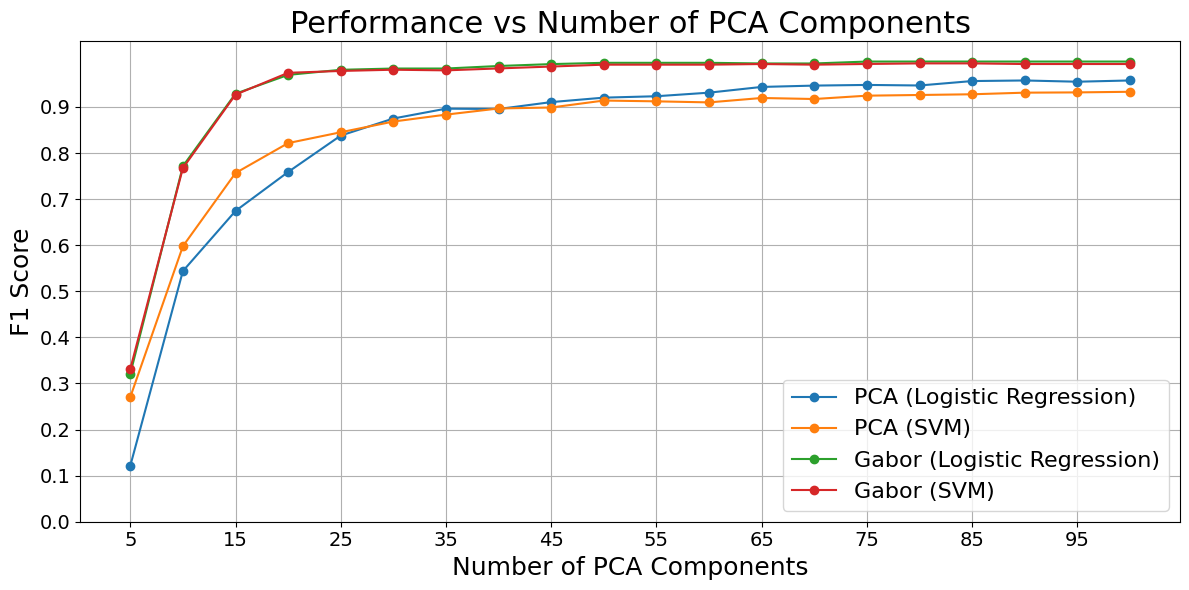

In [73]:
plt.figure(figsize=(12, 6))
plt.plot(components_range_log_reg, f1_scores_log_reg, marker='o', linestyle='-')
plt.plot(components_range_svm, f1_scores_svm, marker='o', linestyle='-')
plt.plot(components_range_log_reg_gabor, f1_scores_log_reg_gabor, marker='o', linestyle='-')
plt.plot(components_range_svm_gabor, f1_scores_svm_gabor, marker='o', linestyle='-')
plt.title("Performance vs Number of PCA Components", fontsize=22)
plt.xlabel("Number of PCA Components", fontsize=18)
plt.ylabel("F1 Score", fontsize=18)
plt.legend(['PCA (Logistic Regression)', 'PCA (SVM)', 'Gabor (Logistic Regression)', 'Gabor (SVM)'], fontsize=16)
plt.grid(True)
plt.xticks(np.arange(5, 101, 10), fontsize=14)
plt.yticks(np.arange(0, 1, 0.1), fontsize=14)
plt.tight_layout()
plt.show()